In [1]:
import os
import csv
import re
import pandas as pd
import numpy as np

#将数据分割为训练集和测试集
from sklearn.model_selection import train_test_split

#用于标准化数据
from sklearn.preprocessing import StandardScaler
#一种线性分类技术
from sklearn.linear_model import LogisticRegression
#一种线性分类技术
from sklearn.linear_model import SGDClassifier
#用于分析数据
from sklearn.metrics import classification_report

In [2]:
# 载入数据
from numpy import genfromtxt
train_dataset = genfromtxt('iris_data/train.csv',delimiter=',')
val_dataset = genfromtxt('iris_data/val.csv',delimiter=',')
test_data = genfromtxt('iris_data/test_data.csv',delimiter=',')

train_data = train_dataset[1:,:4]
train_label = train_dataset[1:,4]
val_data = val_dataset[1:,:4]
val_label = val_dataset[1:,4]
test_data = test_data[1:,:]

# 扩展标签
classname = np.unique(train_label)
print(classname)
multi_label = np.zeros([len(train_label),len(classname)])
for i in range(len(classname)):
    multi_label[np.where(train_label==classname[i]),i] = 1
print(multi_label)

multi_val_label = np.zeros([len(val_label),len(classname)])
for i in range(len(classname)):
    multi_val_label[np.where(val_label==classname[i]),i] = 1

[0. 1. 2.]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 

In [3]:
# 类平均向量mc
mc = np.zeros([3,len(train_data[0])])
mc_num = np.zeros([3,1])
for i in range(len(train_label)):
    if train_label[i] == 0:
        mc[0] += train_data[i]
        mc_num[0] += 1
        continue
    if train_label[i] == 1:
        mc[1] += train_data[i]
        mc_num[1] += 1
        continue
    if train_label[i] == 2:
        mc[2] += train_data[i]
        mc_num[2] += 1
        continue
for i in range(len(mc_num)):
    mc[i] /= mc_num[i]
print(mc)

[[4.990625   3.390625   1.45625    0.24375   ]
 [5.91071429 2.76071429 4.17142857 1.31428571]
 [6.66756757 2.97567568 5.56486486 2.03513514]]


In [4]:
# 总平均向量m_red
m = np.zeros(len(train_data[0]))
for i in range(len(train_data[0])):
    m[i] = train_data[:, i].mean()
print(m)

[5.89587629 3.05051546 3.80721649 1.23608247]


In [5]:
# 构建Sw,Sb，ST
Sw = np.zeros([4,4])
for i in range(3):
    for j in range(len(train_label)):
        if train_label[j] == i:
            temp = train_data[j] - mc[i]
            Sw += np.outer(temp ,temp.T)
# print(Sw)
print(Sw.shape)
Sb = np.zeros([4,4])
for i in range(3):
    temp = mc[i] - m[i]
    Sb += mc_num[i] * np.outer(temp, temp.T)
# print(Sb)
print(Sb.shape)
ST = Sw + Sb

(4, 4)
(4, 4)


In [6]:
# 求解投影方向
w = np.linalg.eig(np.linalg.pinv(Sw)*Sb)[1][0:2]
print(w)

[[ 0.00714901  0.50354232 -0.84367805 -0.18601445]
 [-0.0972321  -0.02277262 -0.22795876  0.96853608]]


[[-2.26966338e+00 -1.46609884e-01]
 [-2.24725526e+00 -3.72746699e-01]
 [-3.47161940e+00  5.06564931e-02]
 [ 5.10951404e-01 -6.32502401e-01]
 [-3.12028194e+00  3.23546739e-01]
 [ 3.36649607e-01 -3.49477011e-01]
 [ 5.98991260e-01 -7.57542929e-01]
 [-2.09605794e+00 -3.61025288e-01]
 [-3.41795977e+00 -2.10734701e-01]
 [-3.56441300e+00  3.95370597e-01]
 [-3.34672477e+00 -3.20482003e-01]
 [-3.92140454e+00 -2.87182438e-01]
 [-2.19607004e+00 -4.25080750e-01]
 [-4.00859502e+00  2.00795683e-02]
 [-2.55618155e+00 -2.09460278e-01]
 [-2.16277137e+00 -3.90284403e-01]
 [-3.06424544e+00 -4.76812427e-02]
 [-3.12682248e+00 -3.86111079e-01]
 [-2.81888985e+00  8.73281107e-02]
 [-3.26792315e+00  3.09310132e-02]
 [-2.56432858e+00 -4.68952699e-01]
 [-3.20205925e+00  5.13601410e-02]
 [-2.33923641e+00 -1.36976160e-01]
 [ 2.08208659e-01 -7.08335975e-01]
 [-3.25515700e+00  5.21966621e-02]
 [-2.38566789e+00 -3.04315685e-01]
 [-1.77875259e+00 -1.72094955e-01]
 [-2.31835564e+00 -2.44446200e-01]
 [-2.58710335e+00 -3

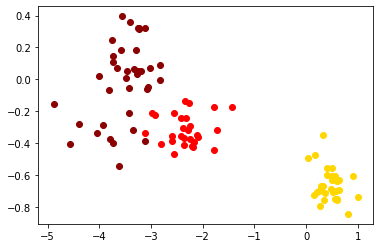

In [7]:
# LDA降维与可视化
import matplotlib.pyplot as plt
train_data_lda = np.dot(train_data, w.T)
val_data_lda = np.dot(val_data, w.T)


if len(train_data_lda[0]) == 2:
    color = ['gold',  'red', 'darkred']
    for i, c in zip(classname, color):
        plt.scatter(train_data_lda[np.where(train_label==i), 0], train_data_lda[np.where(train_label==i), 1], c=c)
    plt.show()

In [ ]:
ss = StandardScaler()

In [ ]:
lr = LogisticRegression(multi_class='ovr')

In [ ]:
# 降维后

In [ ]:
# 5重交叉验证
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)

In [14]:
# 对降维后的数据进行logistic回归分类
# 使用交叉验证，记录每次学习得到的w和b

w_stack = []
acc_stack = []
ford = 1
for X_train_i,X_test_i in kf.split(train_data_lda):
    time_start = time.time()
    w = np.ones([6, len(train_data_lda[0])])
    b = np.ones([6, 1])
    
    X_train = ss.fit_transform(train_data_lda[X_train_i])
    X_test = ss.fit_transform(train_data_lda[X_test_i])
    y_train = train_label[X_train_i]
    y_test = train_label[X_test_i]

    lr.fit(X_train, y_train)
    lr_y_predict = lr.predict(X_test)
    acc = lr.score(X_test, y_test)
    time_end = time.time()
    print('%s  %f s' % ("训练耗时为\n", (time_end - time_start)))
    print("\033[1;31;47m   Ford%d:acc = %f \033[0m" %(ford, acc))
    #print(classification_report(y_test, lr_y_predict, target_names=['3', '4', '5', '6', '7', '8']))
    w_stack.append(lr.coef_)
    acc_stack.append(acc)
    ford += 1

训练耗时为  2.919658 s
   Ford1:acc = 0.950000  

训练耗时为  2.367529 s
   Ford2:acc = 1.000000  

训练耗时为  2.383545 s
   Ford3:acc = 0.947368  

训练耗时为  2.368526 s
   Ford4:acc = 1.000000  

训练耗时为  2.394527 s
   Ford5:acc = 0.894737  



In [15]:
print(acc_stack)

[0.95, 1.0, 0.9473684210526315, 1.0, 0.8947368421052632]


In [16]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

In [17]:
# 观察分类器在测试集上的表现

In [27]:
# 降维后
from numpy import *

w = np.array(w_stack).mean(0)
predict = np.zeros(len(val_label))

lr_y_predict = lr.predict(ss.fit_transform(val_data_lda))
acc = lr.score(ss.fit_transform(val_data_lda), val_label)

print("降维后总精度 = %f" %acc)

降维后总精度 = 0.933333


In [28]:
# 逐类分类
count = np.zeros(3)
acc = np.zeros(3)
for i in range(len(predict)):
    if val_label[i] == 0:
        count[0] += 1
        if predict[i] == val_label[i]:
            acc[0] += 1
    if val_label[i] == 1:
        count[1] += 1
        if predict[i] == val_label[i]:
            acc[1] += 1
    if val_label[i] == 2:
        count[2] += 1
        if predict[i] == val_label[i]:
            acc[2] += 1

print(count)
print(acc)
print(acc/count)

[5. 6. 4.]
[5. 5. 4.]
[1.         0.83333333 1.        ]


In [29]:
# 统计某一类的具体精度
count = 0
acc = 0
for i in range(len(predict)):
    if val_label[i] == 1:
        count += 1
        if predict[i] == val_label[i]:
            acc += 1
print(count)
print(acc/count)

6
0.8333333333333334


In [30]:
# 逐分类器分类
for k in range(3):
    predicts = sigmoid(np.dot(test_data_lda_norm, w[k]) + b[k])
    theta = 0.3
    predict = [1 if i > theta else 0 for i in predicts]
    print(np.sum(predict == multi_test_label[:, k])/len(predict))

NameError: name 'test_data_lda_norm' is not defined

In [ ]:
# 单分类器测试
k = 5 # k = 评分
k -= 3
predicts = sigmoid(np.dot(test_data_lda, w[k]) + b[k])
theta = 0.5
predict = [1 if i > theta else 0 for i in predicts]
print(np.sum(predict == multi_test_label[:, k])/len(predict))